Phân tích tập dữ liệu commodity
1. EDA
2. Multivariate Analysis
3. Predictive Model
4. Evaluation and discussison

# 1. EDA


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/HK6 - Data Analysis with R Python [3]/Thực nghiệm/Dataset/Food/all_grains_data.csv')

In [ ]:
df.head()

,ticker,commodity,date,open,high,low,close,volume
0,ZC=F,Corn,2000-07-17,182.25,182.25,178.25,179.25,19385
1,ZC=F,Corn,2000-07-18,179.00,183.25,179.00,180.75,25205
2,ZC=F,Corn,2000-07-19,180.00,182.75,178.75,182.00,17126
3,ZC=F,Corn,2000-07-20,181.50,187.00,181.00,186.00,18742
4,ZC=F,Corn,2000-07-21,185.50,188.00,185.00,187.75,16814


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35711 entries, 0 to 35710
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     35711 non-null  object 
 1   commodity  35711 non-null  object 
 2   date       35711 non-null  object 
 3   open       35711 non-null  float64
 4   high       35711 non-null  float64
 5   low        35711 non-null  float64
 6   close      35711 non-null  float64
 7   volume     35711 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 2.2+ MB


Fixing format

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['date']

0       2000-07-17
1       2000-07-18
2       2000-07-19
3       2000-07-20
4       2000-07-21
           ...    
35706   2024-03-28
35707   2024-04-01
35708   2024-04-02
35709   2024-04-03
35710   2024-04-04
Name: date, Length: 35711, dtype: datetime64[ns]

Check null

In [ ]:
df.isna().sum()

ticker       0
commodity    0
date         0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

Check duplicate

In [ ]:
df.duplicated().sum()

0

Visualization

In [ ]:
numeric_features = ['open','high','low','close','volume']
categorical_features = ['ticker','commodity']

Distribution

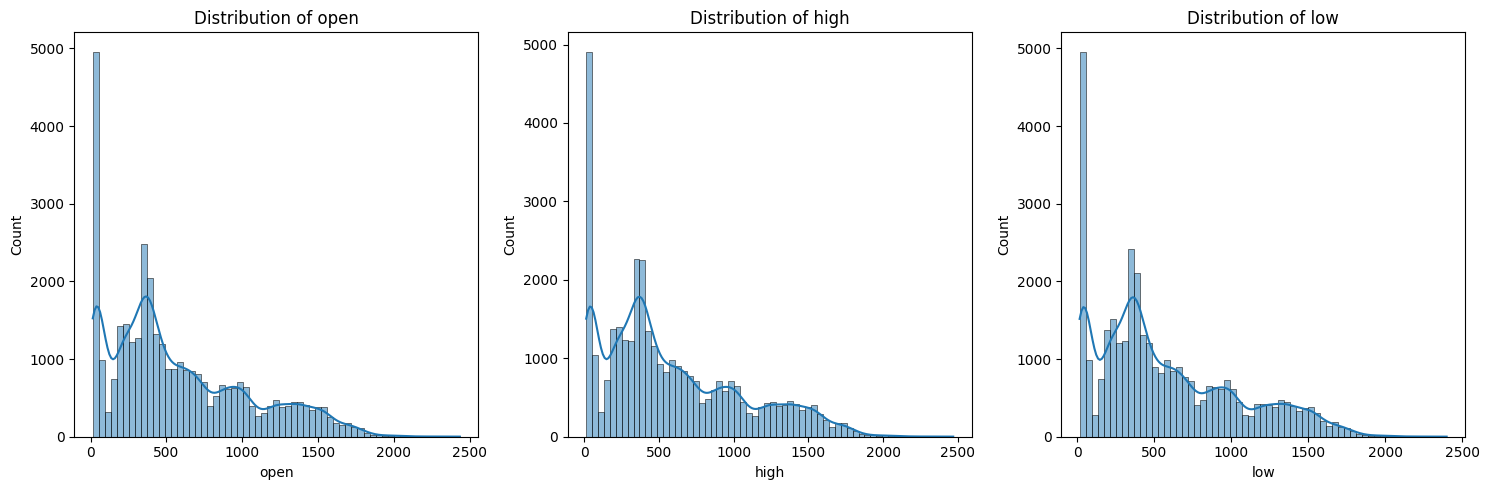

In [ ]:
fig, axes  = plt.subplots(nrows=1,ncols=3, figsize=(15,5))

for i,col in enumerate(numeric_features[:3]):
  sns.histplot(data=df, x=col ,kde=True, ax=axes[i], alpha=0.5)
  axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

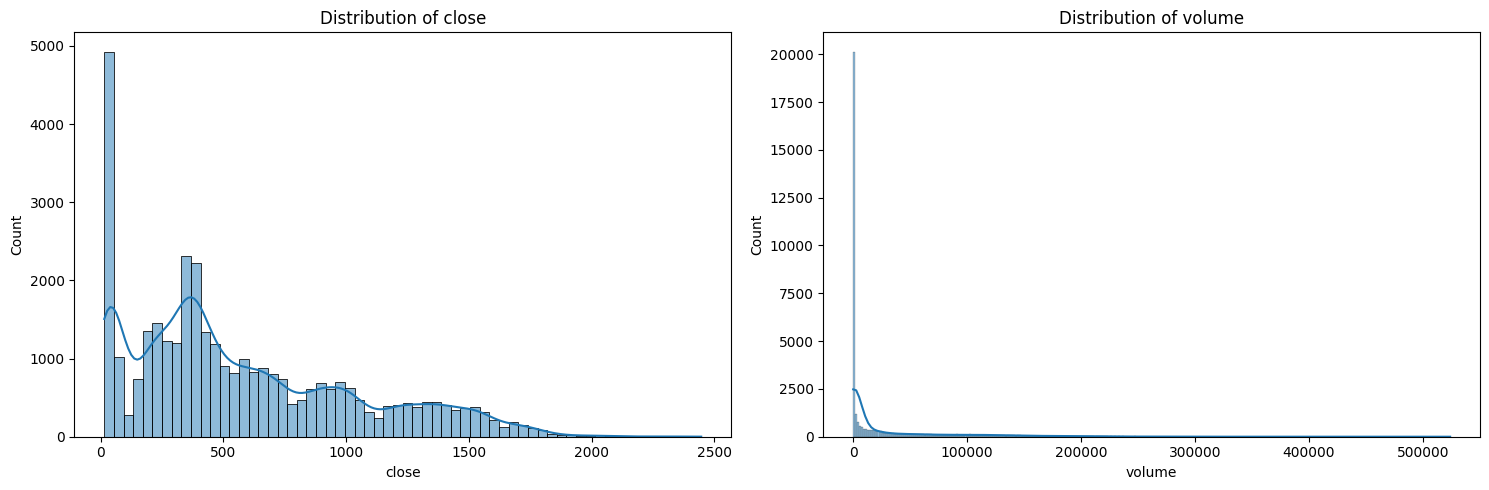

In [ ]:
fig, axes  = plt.subplots(nrows=1,ncols=2, figsize=(15,5))

for i,col in enumerate(numeric_features[3:]):
  sns.histplot(data=df, x=col ,kde=True, ax=axes[i], alpha=0.5)
  axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Boxplot

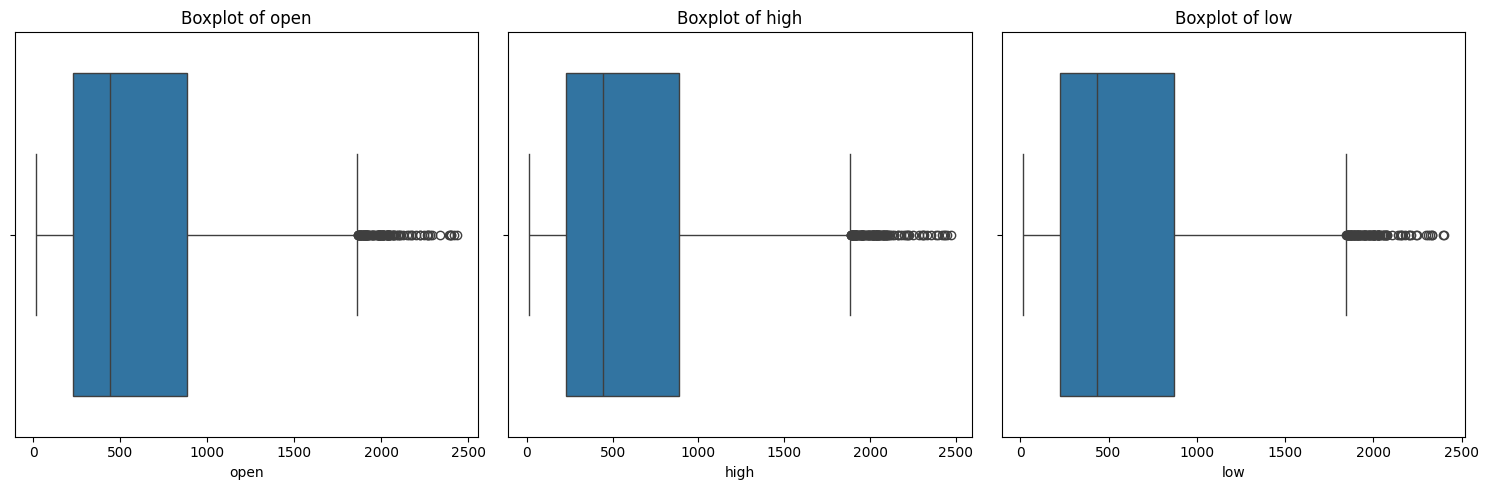

In [ ]:
fig, axes  = plt.subplots(nrows=1,ncols=3, figsize=(15,5))

for i,col in enumerate(numeric_features[:3]):
  sns.boxplot(data=df, x=col, ax=axes[i])
  axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

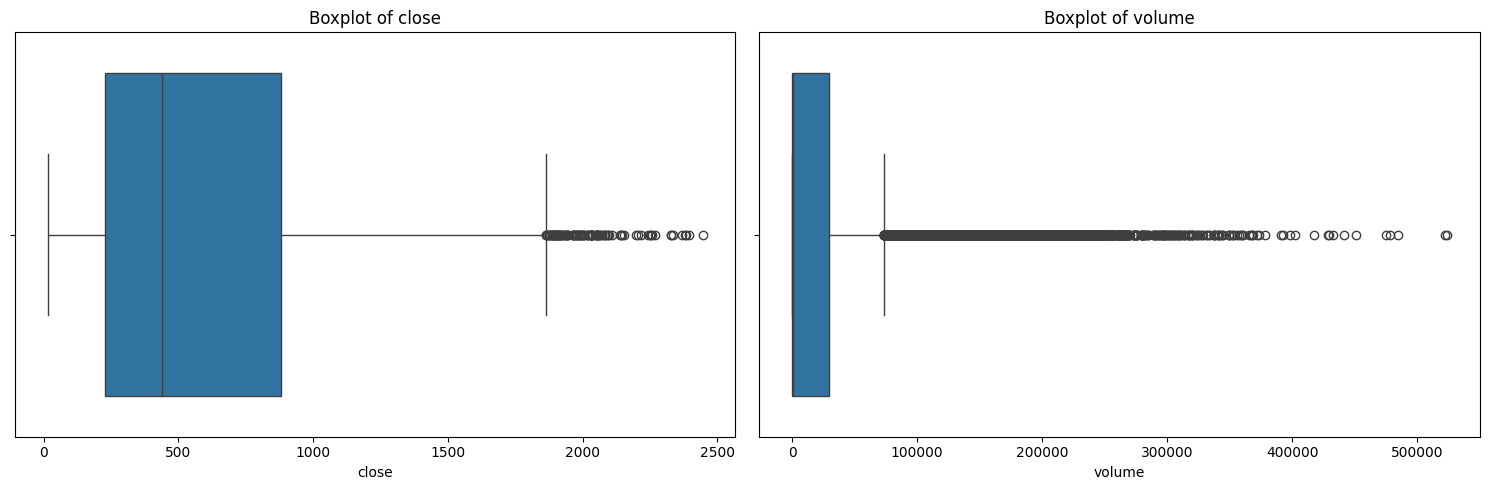

In [ ]:
fig, axes  = plt.subplots(nrows=1,ncols=2, figsize=(15,5))

for i,col in enumerate(numeric_features[3:]):
  sns.boxplot(data=df, x=col, ax=axes[i])
  axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Categories

<Axes: xlabel='commodity'>

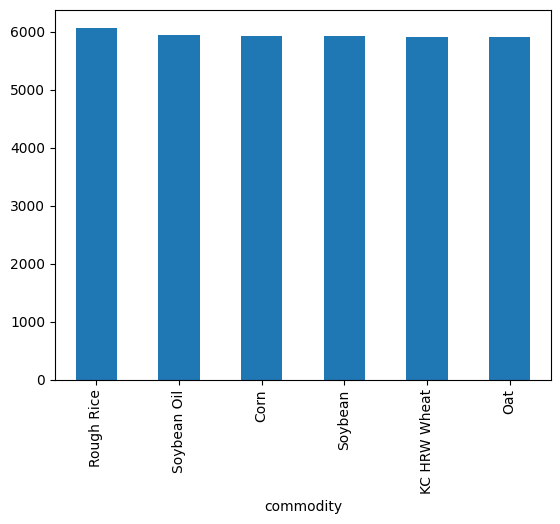

In [ ]:
df['commodity'].value_counts().plot(kind= 'bar')

Time Series Analysis

In [ ]:
df['year'] = df['date'].dt.year

Average all commodity by year

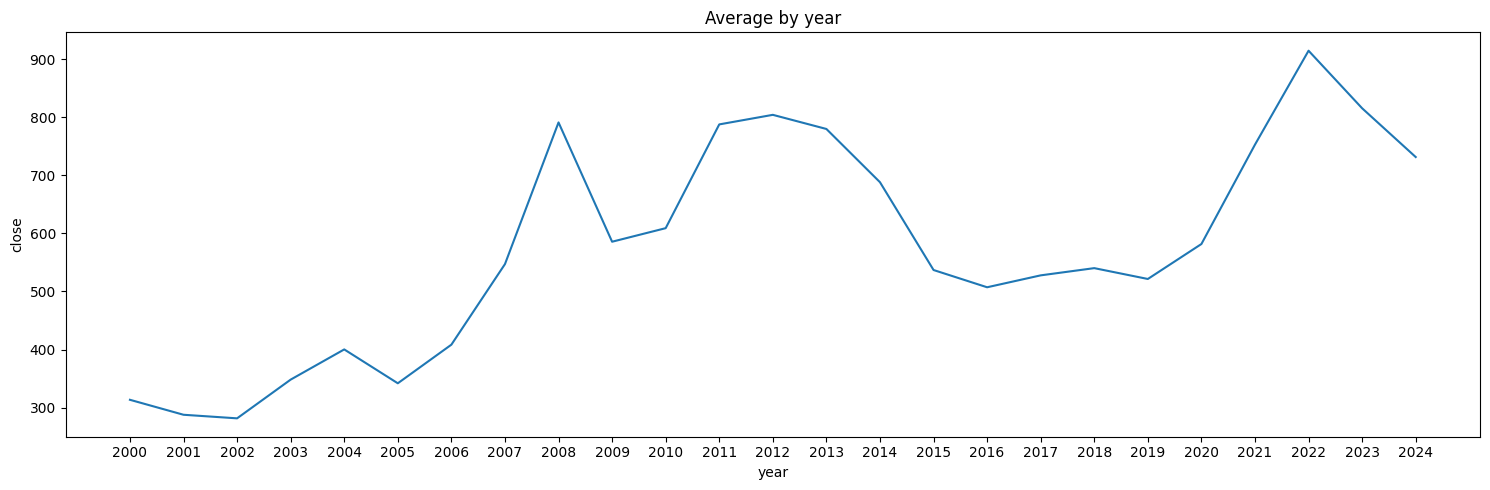

In [ ]:
df_year  = df.drop(columns=['ticker','commodity']).groupby('year').mean()

fig, ax= plt.subplots(figsize=(15,5))

sns.lineplot(data=df_year, x='year',y='close', ax=ax)
ax.set_title(f'Average by year')

major_ticks = np.arange(df['year'].min(), df['year'].max() + 1, 1)  # Define ticks from min to max year
ax.set_xticks(major_ticks)  # Set the major ticks (bins) positions on the x-axis

plt.tight_layout()
plt.show()

In [ ]:


fig, axes  = plt.subplots(nrows=1,ncols=3, figsize=(15,5))

for i,col in enumerate(numeric_features[:3]):
  sns.histplot(data=df, x=col ,kde=True, ax=axes[i], alpha=0.5)
  axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
df_corn = df[df['commodity'] == 'Corn']

In [ ]:
df_corn.head()

,ticker,commodity,date,open,high,low,close,volume,year
0,ZC=F,Corn,2000-07-17,182.25,182.25,178.25,179.25,19385,2000
1,ZC=F,Corn,2000-07-18,179.00,183.25,179.00,180.75,25205,2000
2,ZC=F,Corn,2000-07-19,180.00,182.75,178.75,182.00,17126,2000
3,ZC=F,Corn,2000-07-20,181.50,187.00,181.00,186.00,18742,2000
4,ZC=F,Corn,2000-07-21,185.50,188.00,185.00,187.75,16814,2000


In [ ]:
sequence = df_corn[df['date'] >= '2022-01-01']

<ipython-input-23-2ba1428ffde5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sequence = df_corn[df['date'] >= '2022-01-01']


In [ ]:
sequence.head()

,ticker,commodity,date,open,high,low,close,volume,year
5366,ZC=F,Corn,2022-01-03,599.00,603.50,584.75,589.25,146023,2022
5367,ZC=F,Corn,2022-01-04,591.75,611.25,591.50,609.50,210268,2022
5368,ZC=F,Corn,2022-01-05,608.50,609.75,601.25,602.25,148499,2022
5369,ZC=F,Corn,2022-01-06,601.25,605.75,596.00,603.75,151442,2022
5370,ZC=F,Corn,2022-01-07,605.25,608.25,599.00,606.75,140371,2022


In [ ]:
sequence = sequence['close']

In [ ]:
sequence = np.asarray(sequence)

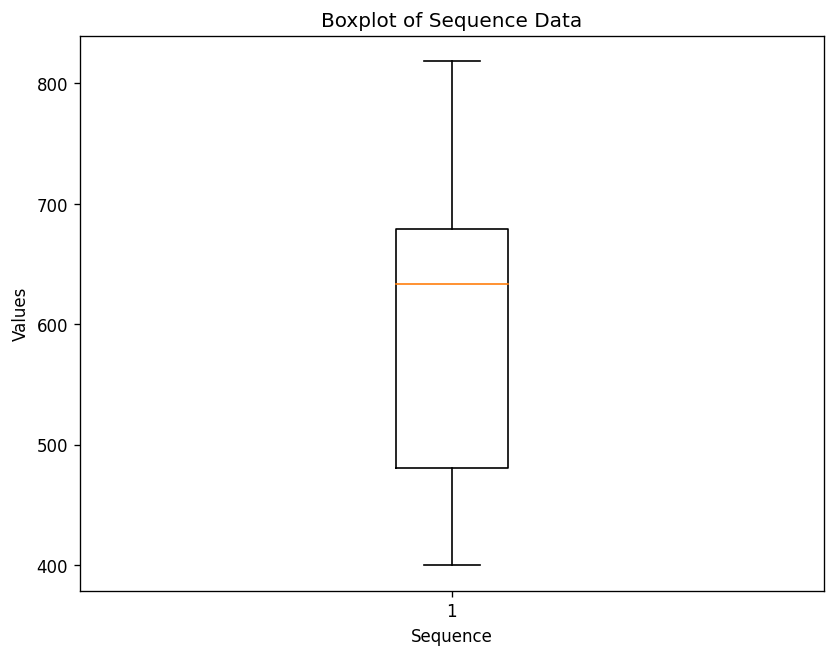

In [ ]:
# Create a boxplot for the sequence data
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(sequence)

# Add labels and title
plt.xlabel('Sequence')
plt.ylabel('Values')
plt.title('Boxplot of Sequence Data')

# Display the plot
plt.show()

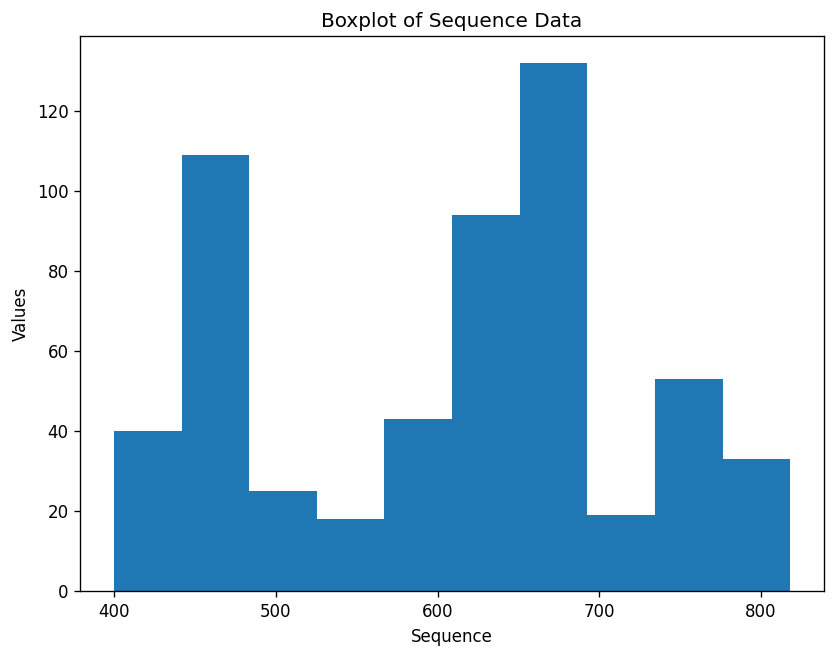

In [ ]:
# Create a boxplot for the sequence data
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.hist(sequence)

# Add labels and title
plt.xlabel('Sequence')
plt.ylabel('Values')
plt.title('Boxplot of Sequence Data')

# Display the plot
plt.show()

Lambda value used for transformation: 1.2383138595581127


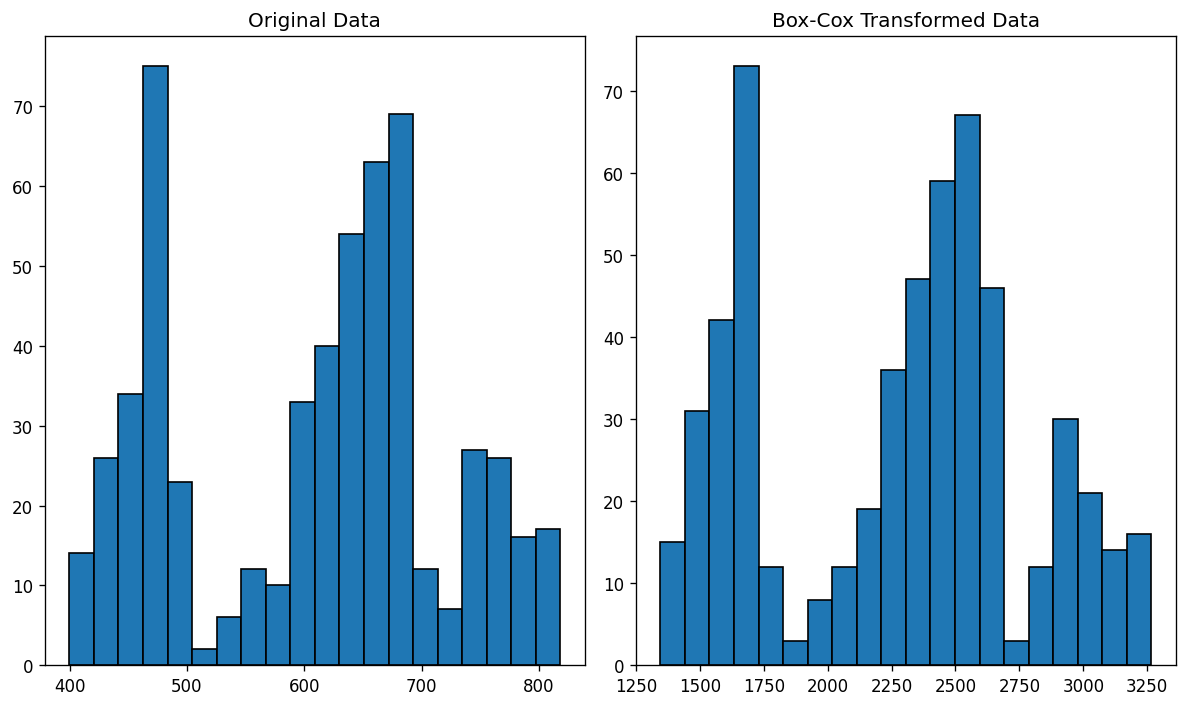

In [ ]:
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Generate example data (replace this with your own data)
# Apply Box-Cox transformation
transformed_data, lambda_value = boxcox(sequence)

# Plot original data and transformed data
plt.figure(figsize=(10, 6))

# Plot original data
plt.subplot(1, 2, 1)
plt.hist(sequence, bins=20, edgecolor='black')
plt.title('Original Data')

# Plot transformed data
plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=20, edgecolor='black')
plt.title('Box-Cox Transformed Data')

# Display lambda value used for transformation
print(f"Lambda value used for transformation: {lambda_value}")

# Show plots
plt.tight_layout()
plt.show()


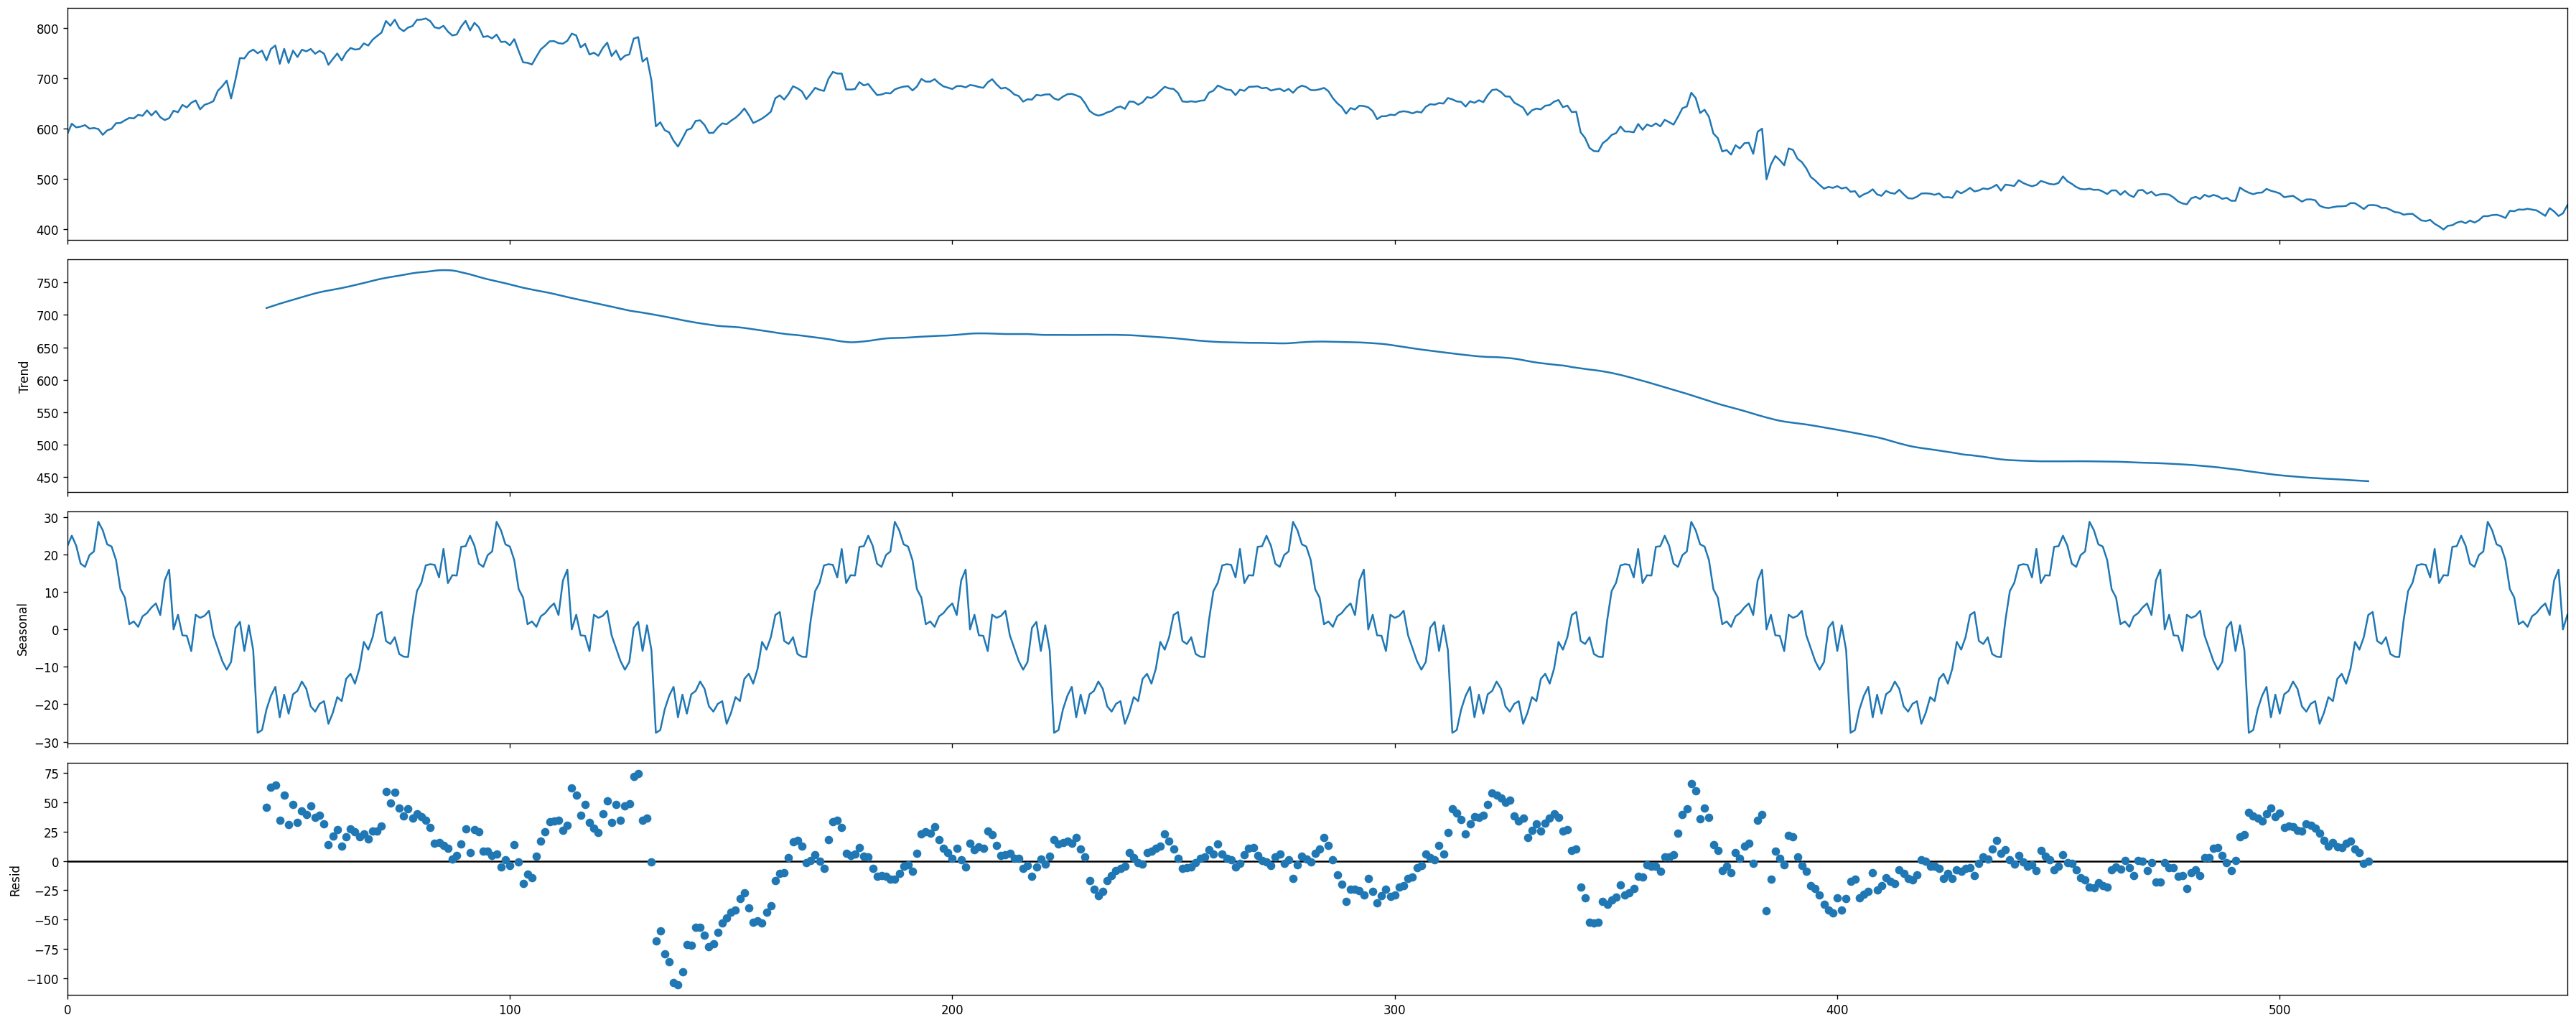

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

result = seasonal_decompose(sequence, model='additive', period = 90)
result.plot()
pyplot.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(sequence)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.647667
p-value: 0.859843


Dữ liệu chưa có tính dừng

In [ ]:
sequence = pd.Series(sequence)

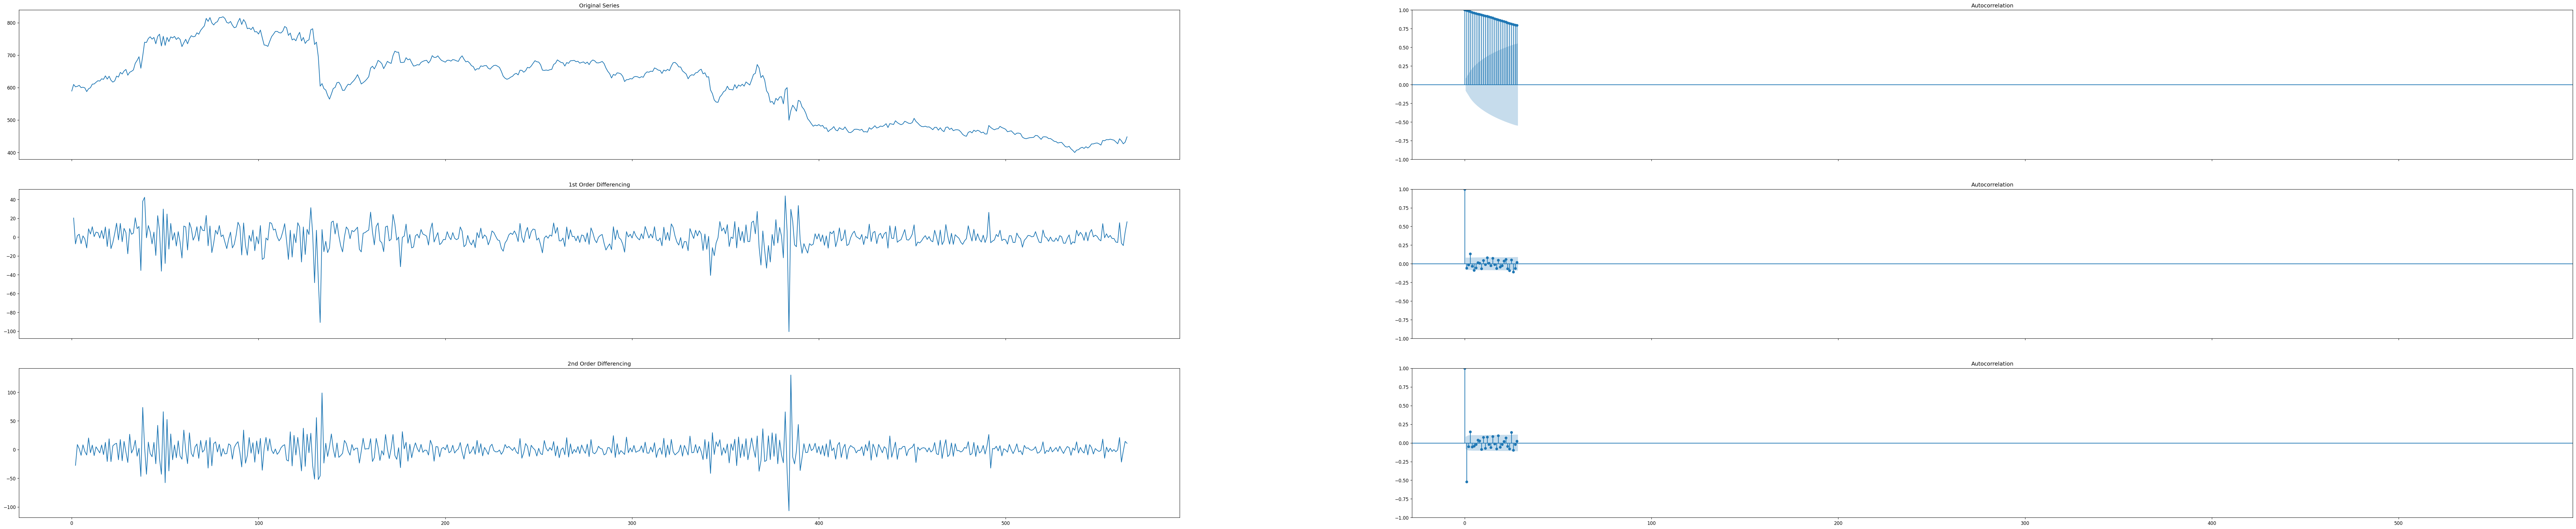

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(100,20), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(sequence); axes[0, 0].set_title('Original Series')
plot_acf(sequence, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(sequence.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(sequence.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(sequence.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(sequence.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [ ]:
sequence.isna().sum()

0

In [ ]:
sequence.diff()

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(sequence.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.978641
p-value: 0.000000


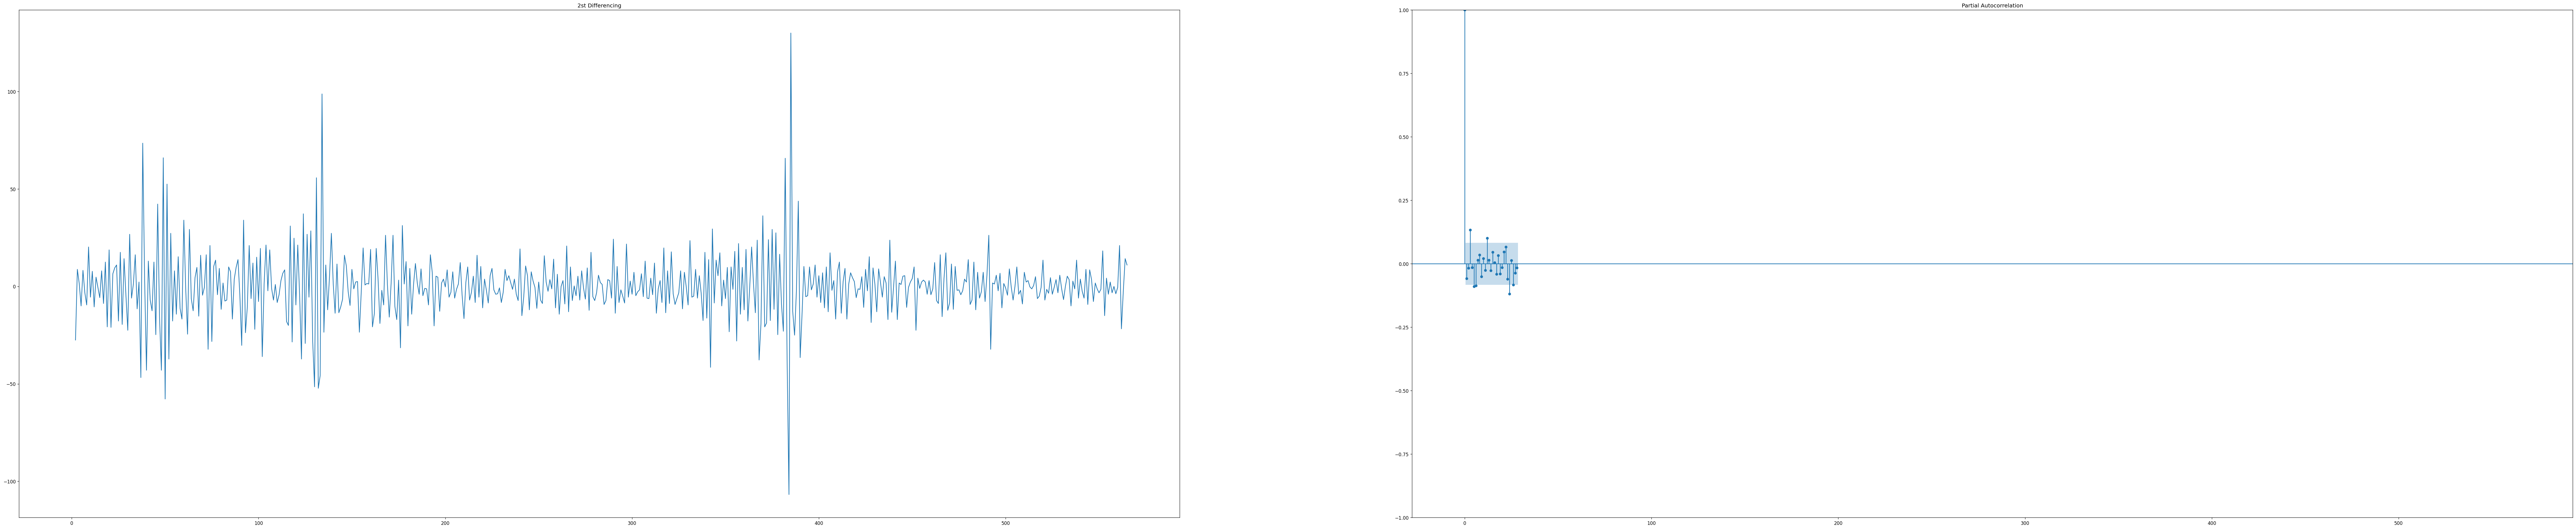

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(100,20), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(sequence.diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(sequence.diff().dropna(), ax=axes[1])

plt.show()

p=3

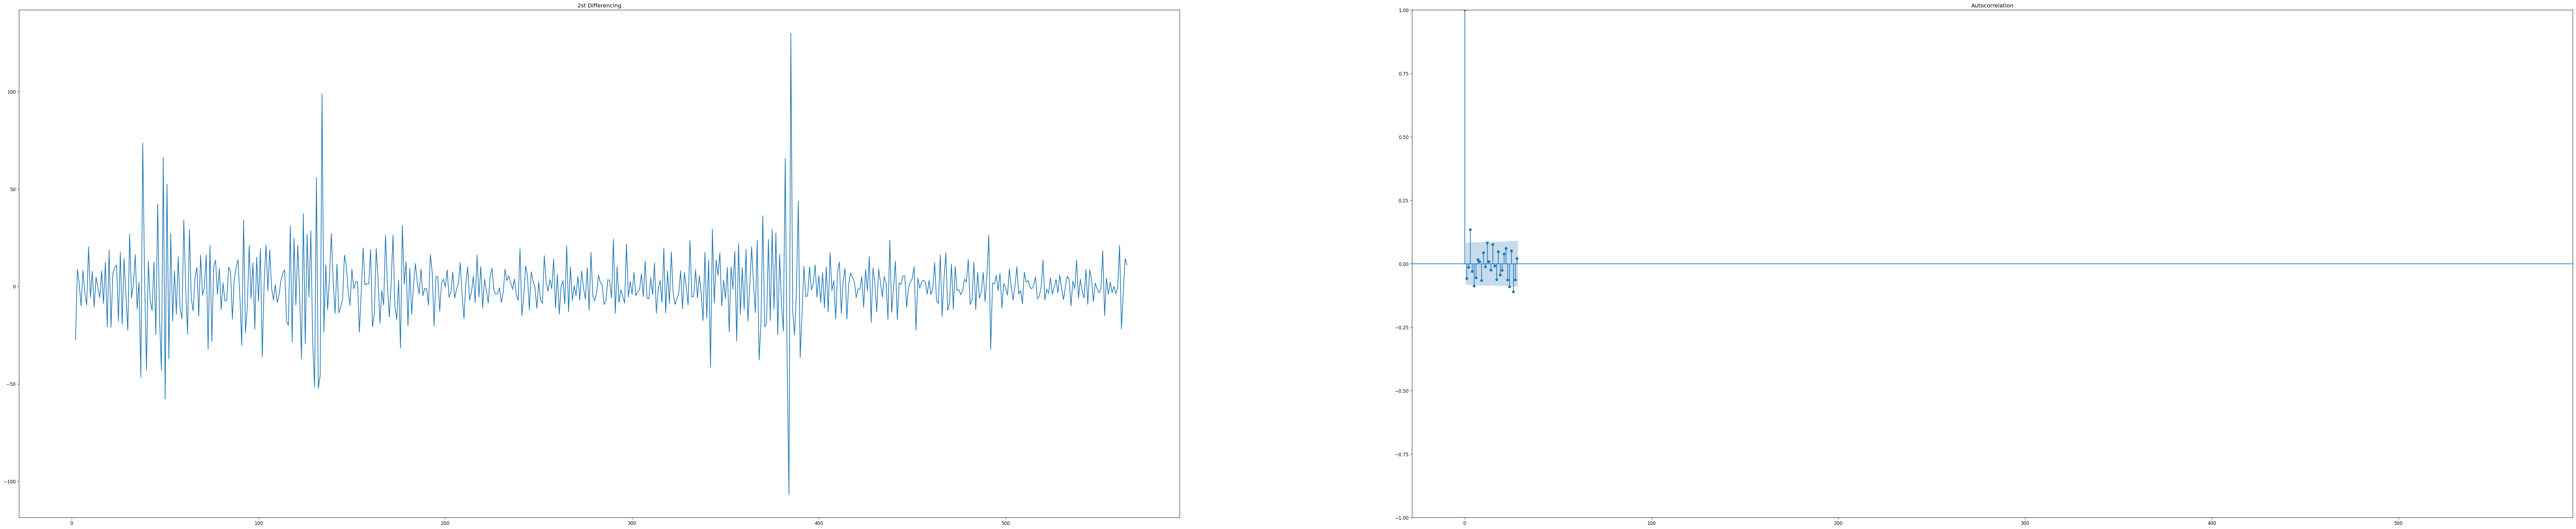

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(100,20), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(sequence.diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(sequence.diff().dropna(), ax=axes[1])

plt.show()

(3,2,3)

In [ ]:
train_size = int(len(sequence) * 0.8)
sequence = np.asarray(sequence)

train = sequence[:train_size]
test = sequence[train_size:]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(train, order=(3,2,3))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  452
Model:                 ARIMA(3, 2, 3)   Log Likelihood               -1788.461
Date:                Wed, 10 Apr 2024   AIC                           3590.921
Time:                        07:11:39   BIC                           3619.686
Sample:                             0   HQIC                          3602.259
                                - 452                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2452      0.070      3.480      0.001       0.107       0.383
ar.L2         -0.7795      0.084     -9.233      0.000      -0.945      -0.614
ar.L3          0.0663      0.039      1.714      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(train, order=(2,2,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  452
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1796.848
Date:                Wed, 10 Apr 2024   AIC                           3603.696
Time:                        07:11:53   BIC                           3624.242
Sample:                             0   HQIC                          3611.794
                                - 452                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6781      0.327     -2.075      0.038      -1.319      -0.038
ar.L2         -0.0879      0.037     -2.360      0.018      -0.161      -0.015
ma.L1         -0.3731      0.329     -1.133      0.2

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(train, order=(2,2,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  452
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -1797.861
Date:                Wed, 10 Apr 2024   AIC                           3603.723
Time:                        07:12:03   BIC                           3620.160
Sample:                             0   HQIC                          3610.201
                                - 452                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0564      0.031     -1.848      0.065      -0.116       0.003
ar.L2         -0.0060      0.030     -0.200      0.842      -0.065       0.053
ma.L1         -0.9952      0.012    -83.287      0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
best_model = ARIMA(train, order=(3,2,3))
best_model_fit = model.fit()
print(best_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  452
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -1797.861
Date:                Wed, 10 Apr 2024   AIC                           3603.723
Time:                        07:12:18   BIC                           3620.160
Sample:                             0   HQIC                          3610.201
                                - 452                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0564      0.031     -1.848      0.065      -0.116       0.003
ar.L2         -0.0060      0.030     -0.200      0.842      -0.065       0.053
ma.L1         -0.9952      0.012    -83.287      0.0

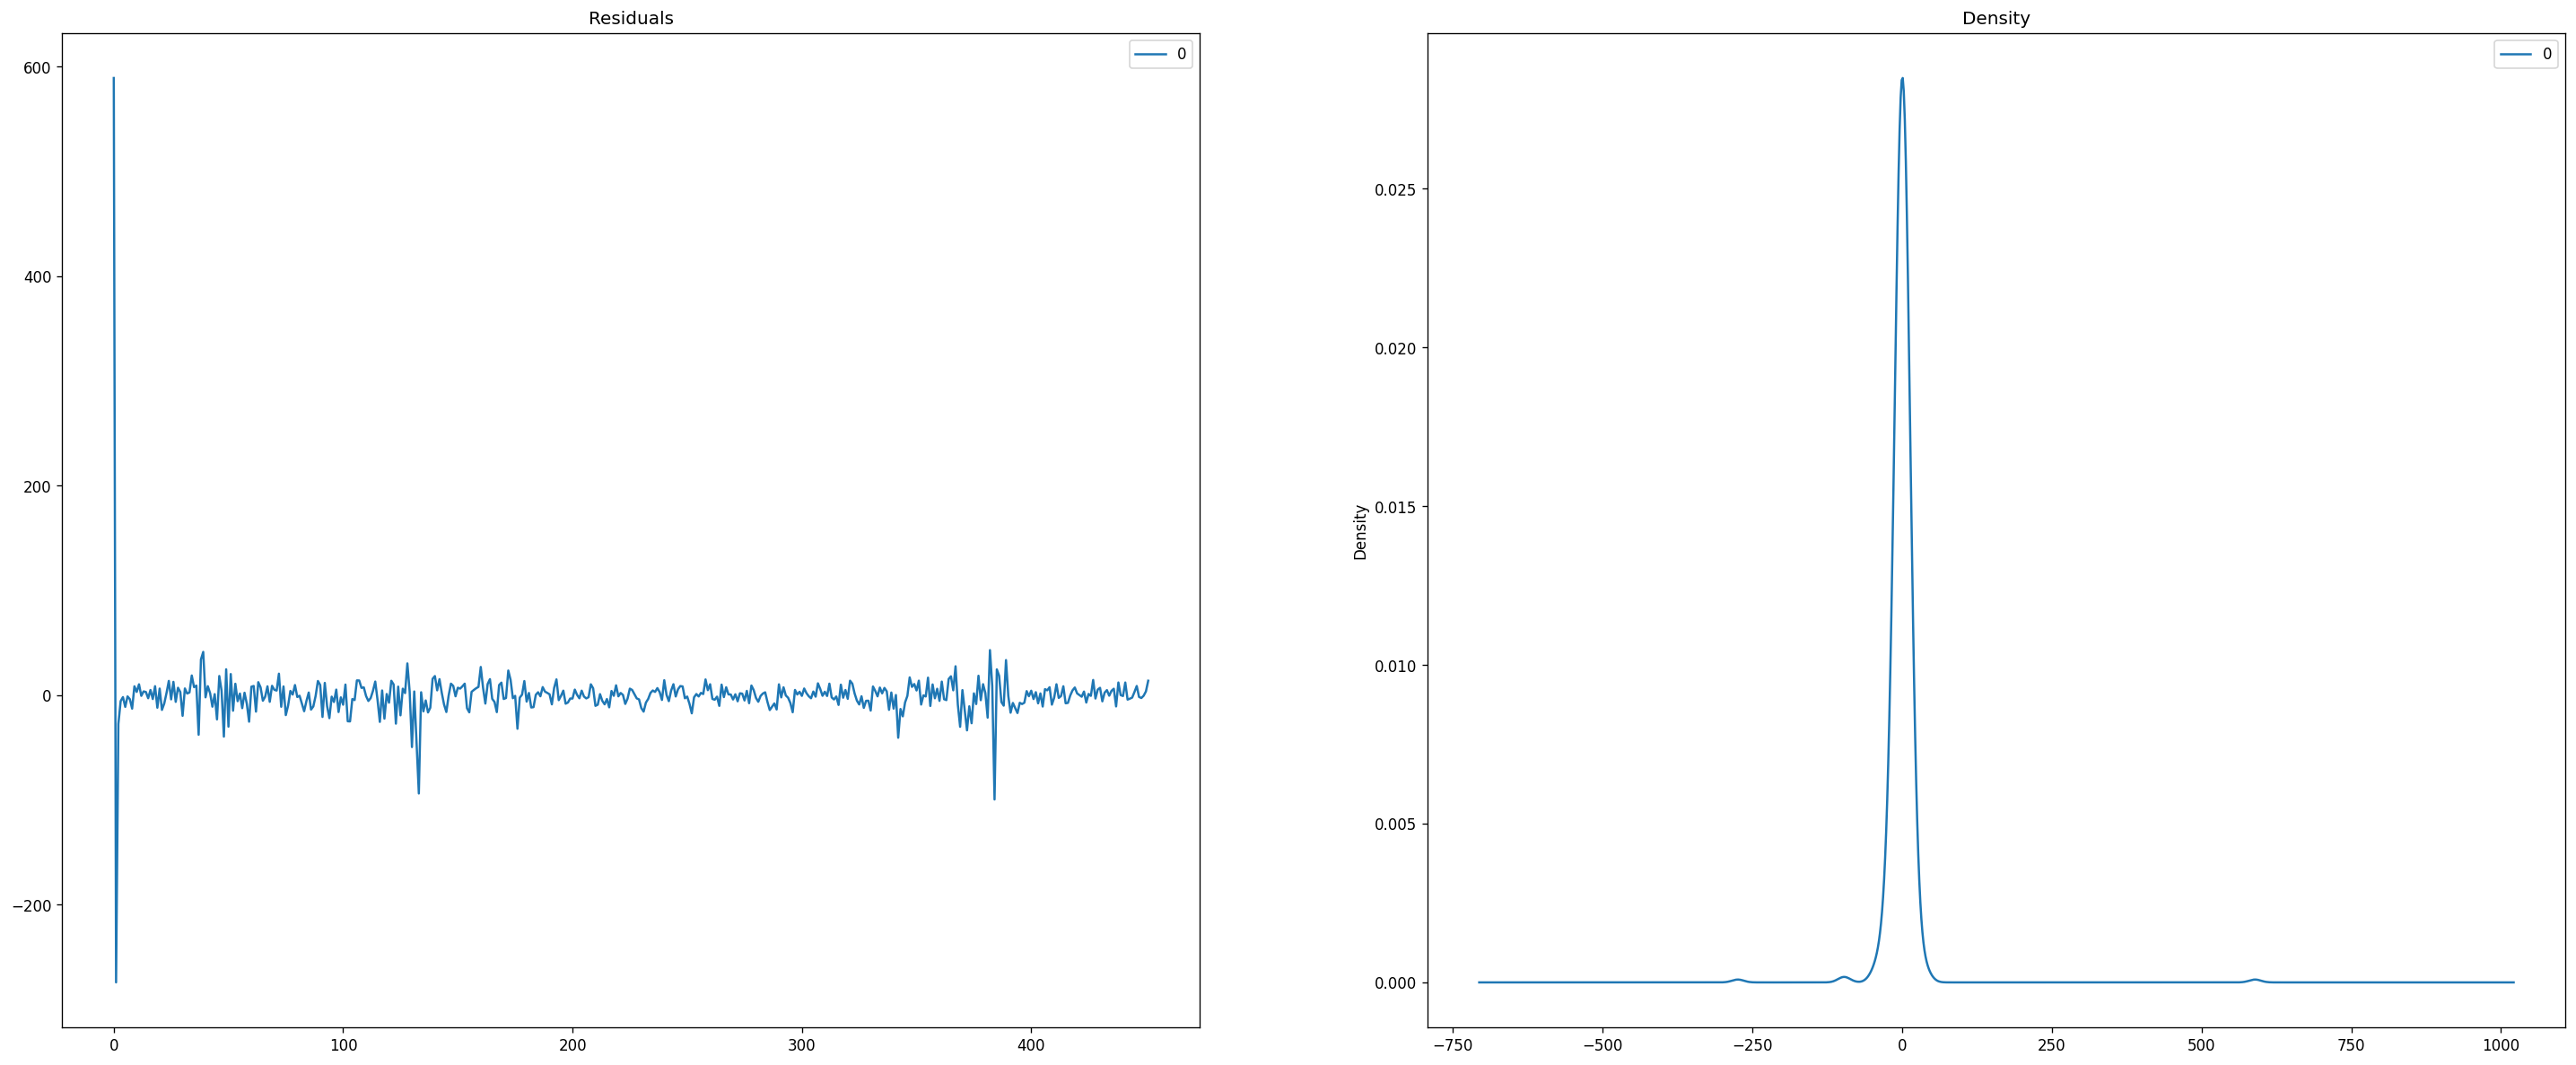

In [ ]:
# Plot residual errors
plt.rcParams.update({'figure.figsize':(30,12), 'figure.dpi':120})


residuals = pd.DataFrame(best_model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
n_pred_perious = len(test)-1
prediction= best_model_fit.predict(end=n_pred_perious)

In [ ]:
len(test)

114

In [ ]:
len(prediction)

114

In [ ]:
prediction.shape

(114,)

In [ ]:
sequence = pd.Series(sequence)

<Figure size 960x720 with 0 Axes>

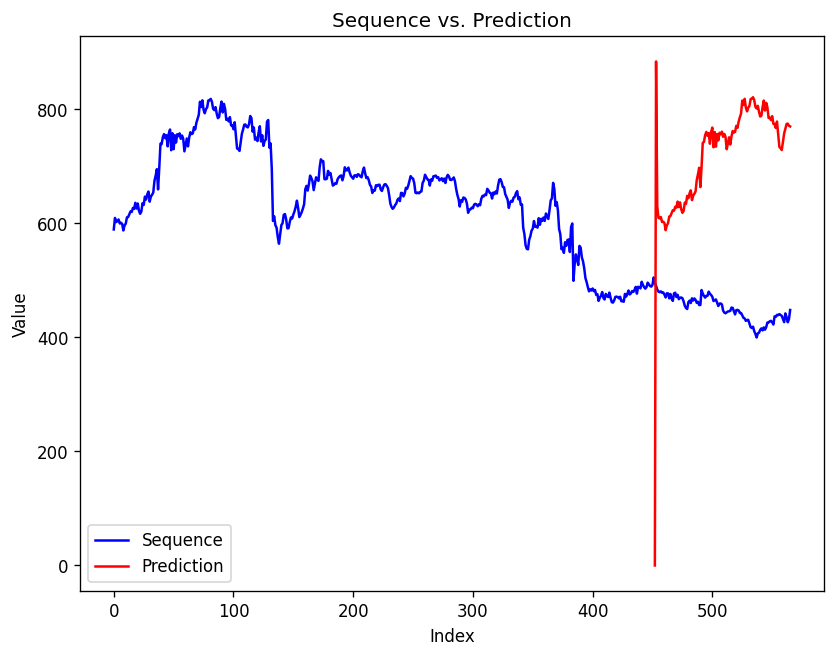

In [ ]:
# Plot sequence and test function on the same line plot
plt.figure(figsize=(8, 6))

# Create an array of indices for the sequence and prediction
x_sequence = np.arange(len(sequence))  # Indices for the sequence
x_prediction = np.arange(len(sequence)-len(prediction), len(sequence))  # Indices for the prediction

# Plot sequence and prediction on the same line plot
plt.figure(figsize=(8, 6))

# Plot the sequence (blue line)
plt.plot(x_sequence, sequence, color='blue', label='Sequence')

# Plot the prediction (red line)
plt.plot(x_prediction, prediction, color='red', label='Prediction')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Sequence vs. Prediction')
plt.legend()

# Show plot
plt.show()

In [ ]:
def _measure_metric(y, yhat):
  e = y-yhat
  mse=np.mean(e**2)
  rmse=np.sqrt(mse)
  mae=np.mean(np.abs(e))
  mape=np.mean(e/y)

  print('Mean Square Error: {}'.format(mse))
  print('Root Mean Square Error: {}'.format(rmse))
  print('Mean Absolute Error: {}'.format(mae))
  print('Mean Absolute Percentage Error: {}'.format(mape))
  return mse, rmse, mae, mape

mse, rmse, mae, mape=_measure_metric(test, prediction)

Mean Square Error: 86022.76703967983
Root Mean Square Error: 293.29638088404675
Mean Absolute Error: 278.71781628009865
Mean Absolute Percentage Error: -0.6101274812776429


In [ ]:
corn = pd.DataFrame({"Train": train, "Test": test})

ValueError: All arrays must be of the same length